In [36]:
fda=2584
logp=8000
bbbp=1639
bace=1210

In [38]:
import os
import re

# Define the dictionary to store the extracted details for each dataset
data = {}
data_name="FDA"

# Define the directory containing the files
directory = f'Plot_data\AUC_Loss Data\{data_name}'

# Loop through the files in the directory
for filename in os.listdir(directory):
    if filename.endswith(".txt"):
        with open(os.path.join(directory, filename), 'r') as file:
            content = file.read()
            
            # Use regular expressions to find the train loss and test AUC-ROC in each epoch
            train_loss = re.findall(r'Train Loss: (\d+\.\d+)', content)
            train_auc = re.findall(r'Train AUC-ROC: (\d+\.\d+)', content)

            # Convert the lists to float
            train_loss = [float(i) for i in train_loss]
            train_auc = [float(i) for i in train_auc]
            
            # Store the details for the current dataset
            data[filename[:-4]] = {'train_loss': train_loss, 'train_auc': train_auc}

for key, value in data.items():
    if key =="TraGT":
        value['train_loss'] = [round(x / float(fda),4) for x in value['train_loss']]
    
    print(key)
    print(value['train_loss'])
    print(value['train_auc'])
    print(len(value['train_loss']))
    print(len(value['train_auc']))
    print()
    

GT
[0.5199, 0.3536, 0.3105, 0.2971, 0.2866, 0.2761, 0.2643, 0.2619, 0.2518, 0.2497, 0.2525, 0.2439, 0.2409, 0.235, 0.2399, 0.2344, 0.2353, 0.2365, 0.2295, 0.234, 0.2219, 0.2257, 0.2276, 0.2225, 0.2272, 0.224, 0.2169, 0.2199, 0.2112, 0.2114, 0.2181, 0.2122, 0.2118, 0.213, 0.2065, 0.2061, 0.2059, 0.216, 0.2122, 0.2038, 0.2075, 0.2007, 0.1978, 0.2047, 0.2069, 0.2002, 0.2033, 0.198, 0.1949, 0.2, 0.1901, 0.1895, 0.1899, 0.1995, 0.1878, 0.1973, 0.1904, 0.1951, 0.1919, 0.1909, 0.1898, 0.1927, 0.1908, 0.1899, 0.1844, 0.1894, 0.182, 0.18, 0.1881, 0.1895, 0.1873, 0.1957, 0.1856, 0.1815, 0.1791, 0.1849, 0.1871, 0.182, 0.1801, 0.1788, 0.1799, 0.1779, 0.1789, 0.1858, 0.179, 0.1769, 0.1841, 0.1775, 0.1793, 0.1741, 0.1838, 0.1826, 0.1792, 0.1848, 0.1753, 0.1754, 0.1717, 0.1819, 0.1815, 0.1823]
[0.8287, 0.9259, 0.9425, 0.9464, 0.9501, 0.9536, 0.9577, 0.9589, 0.9616, 0.9619, 0.9615, 0.9635, 0.9646, 0.9657, 0.9652, 0.9662, 0.9664, 0.9659, 0.9673, 0.9669, 0.9692, 0.9684, 0.9681, 0.9696, 0.9682, 0.9689, 0

<string>:9: SyntaxWarning: invalid escape sequence '\{'
<>:9: SyntaxWarning: invalid escape sequence '\{'
<>:9: SyntaxWarning: invalid escape sequence '\A'
<string>:9: SyntaxWarning: invalid escape sequence '\{'
<>:9: SyntaxWarning: invalid escape sequence '\{'
<>:9: SyntaxWarning: invalid escape sequence '\A'
C:\Users\vysha\AppData\Local\Temp\ipykernel_95540\3274882262.py:9: SyntaxWarning: invalid escape sequence '\{'
  directory = f'Plot_data\AUC_Loss Data\{data_name}'
C:\Users\vysha\AppData\Local\Temp\ipykernel_95540\3274882262.py:9: SyntaxWarning: invalid escape sequence '\A'
  directory = f'Plot_data\AUC_Loss Data\{data_name}'


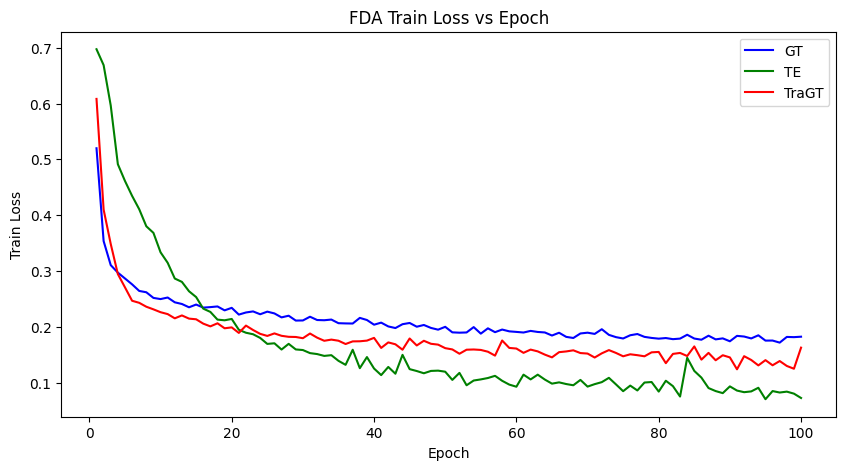

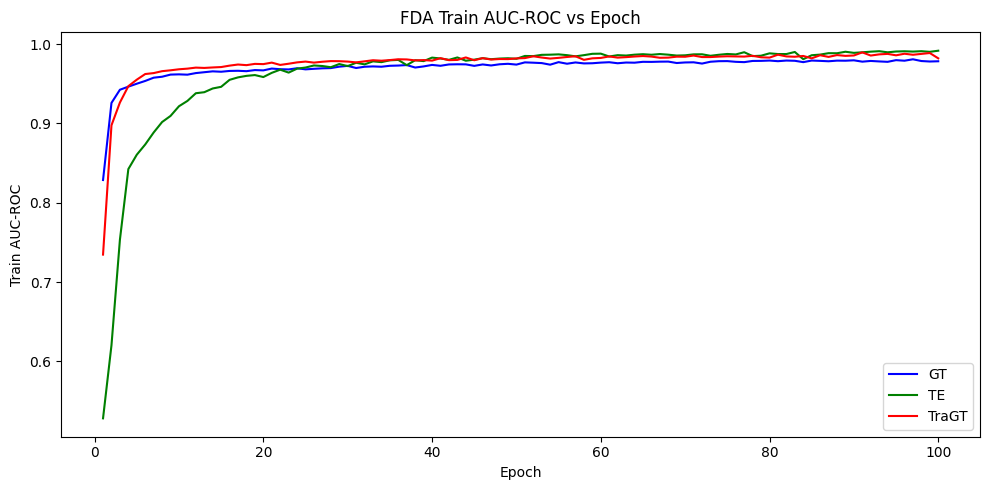

In [39]:
import matplotlib.pyplot as plt

save_dir = f"Plot_data/Plots/{data_name}"

# Create the directory if it doesn't exist
os.makedirs(save_dir, exist_ok=True)


# Create a list of colors for the plots
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

# Create the figure and the subplots for train loss
fig1, ax1 = plt.subplots(figsize=(10, 5))

# Plot train loss against the epoch number for each dataset
for i, (dataset, values) in enumerate(data.items()):
    ax1.plot(range(1, len(values['train_loss']) + 1), values['train_loss'], color=colors[i % len(colors)], label=dataset)

# Set the plot title, labels, and legend for train loss
ax1.set_title(f'{data_name} Train Loss vs Epoch')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Train Loss')
ax1.legend()


# Save the train loss plot
plt.savefig(os.path.join(save_dir, f"{data_name} train_loss_plot.png"))

# Create the figure and the subplots for train AUC-ROC
fig2, ax2 = plt.subplots(figsize=(10, 5))

# Plot train AUC-ROC against the epoch number for each dataset
for i, (dataset, values) in enumerate(data.items()):
    ax2.plot(range(1, len(values['train_auc']) + 1), values['train_auc'], color=colors[i % len(colors)], label=dataset)

# Set the plot title, labels, and legend for train AUC-ROC
ax2.set_title(f'{data_name} Train AUC-ROC vs Epoch')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Train AUC-ROC')
ax2.legend()

# Save the train AUC-ROC plot
plt.savefig(os.path.join(save_dir, "train_aucroc_plot.png"))

# Display the plots
plt.tight_layout()
plt.show()